<a href="https://colab.research.google.com/github/Claudio890/Micro-credential/blob/main/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [6]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [7]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [8]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [9]:
# Mean of all salaries


In [10]:
# Median of all salaries


# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [12]:
new_df=df[['sex','salary']]
new_df.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


In [13]:
new_df.shape

(397, 2)

Finding the Median salary for all males

In [15]:
new_df[new_df['sex']=='Male']['salary'].median()

108043.0

Finding the Median salary for all females

In [16]:
new_df[new_df['sex']=='Female']['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [17]:
mean_males=new_df[new_df['sex']=='Male']['salary'].mean()

In [18]:
mean_females=new_df[new_df['sex']=='Female']['salary'].mean()

In [19]:
# The difference between mean salaries of male and female
mean_males-mean_females


14088.008738003162

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [21]:
sum(df['yrs.service']>=20)

157

In [22]:
df[df['yrs.service']>=20]['salary'].mean()

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [23]:
mean_salary_20_more=df[df['yrs.service']>=20]['salary'].mean()

In [24]:
mean_salary_20_less=df[df['yrs.service']<20]['salary'].mean()

In [25]:
mean_salary_20_more - mean_salary_20_less #on average, people who have 20+ years of experience make $14580 more than people who have less than 20 years of experience

14580.151884288745

People who have salary of greater than or equal to 200,000

In [27]:
sum(df['salary']>=200000)#there are 3 people who make at least 200000

3

Your Findings here...


# 1. People who have more than 20 years of experience make an average of $14580 more than who has less than 20 years of experience.

# 2. Only 3 people make at least $200,000. This means that it is not likely for a professor to make more than this amount.

# Rename values, subset columns, etc

In [41]:
df.rename(columns = {'Unnamed: 0':"ID"}) #change Unnamed: 0 to ID

,ID,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [42]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


# Create some simple visualizations showing some simple statistics

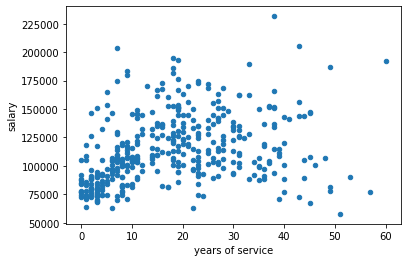

In [30]:
df.plot(kind='scatter',x='yrs.service',y='salary')
plt.xlabel("years of service")
plt.ylabel('salary')
plt.show()

The relation between "years of experience" and "salary" is 0.3, which is a week correlation.

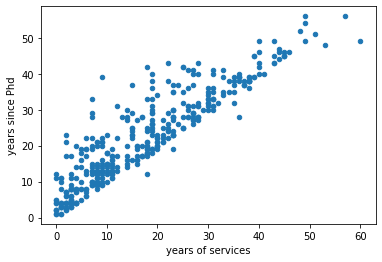

In [33]:
df.corr()
df.corr()>0.9
df.plot(kind='scatter',x='yrs.service', y='yrs.since.phd')
plt.xlabel("years of services")
plt.ylabel("years since Phd")
plt.show()

There is a strong correletion between years of service and years since Phd.

Text(0, 0.5, 'count')

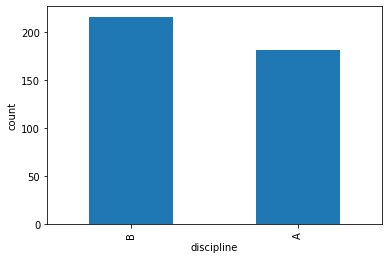

In [34]:
df["discipline"].value_counts().plot(kind='bar') # There are more B disciplines than A
plt.xlabel('discipline')
plt.ylabel('count')

There are more professors with discipline B

Text(0, 0.5, 'count')

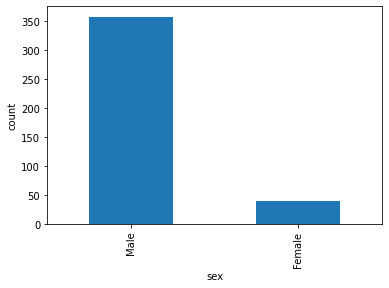

In [35]:
df['sex'].value_counts().plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('count')


There are more "male" professors than "female".

# Draw some conclusions based on the data.  What did you discover?

**Based on the analysis performed above, the conclusions are as follows:**

-People who have more than 20 years of experience make an average of $14580 more than who has less than 20 years of experience.

-Only 3 people make at least $200,000. This means that it is not likely for a professor to make more than this amount.



**I also discovered that:**

-The relation between "years of experience" and "salary" is 0.3, which is week.
-There is a strong correletion between years of service and years since Phd.
-There are more professors with discipline B
-There are more "male" professors than "female".



